<a href="https://colab.research.google.com/github/MicroprocessorX069/CheXNET-/blob/master/Test_XRay_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def get_prediction(image_name="pn.png"):
    device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    num_classes=2
    images=get_tensor(image_name)
    images=images.to(device)
    model = DenseNet121(num_classes).to(device)
    model.load_state_dict(torch.load("/content/pneumonia_model.pth"))

    prediction=model(images.to(device))
    activated_features = SaveFeatures(model._modules.get('densenet121').features.denseblock4.denselayer16)
    prediction = model(images)
    pred_probabilities = F.softmax(prediction).data.squeeze()
    activated_features.remove()
    topk(pred_probabilities,1)

    weight_softmax_params = list(model._modules.get('densenet121').classifier[0].parameters())
    weight_softmax = np.squeeze(weight_softmax_params[0].cpu().data.numpy())
    #weight_softmax*=0.01
    class_idx = topk(pred_probabilities,1)[1].int()
    overlay=getCAM(activated_features.features, weight_softmax,class_idx)

    img = images[0].cpu().numpy()[0]
    print(img.shape)
    #imshow(img,cmap='gray')
    #imshow(skimage.transform.resize(overlay[0], images.shape[2:4]), alpha=0.4, cmap='jet')
    return class_idx,skimage.transform.resize(overlay[0], images.shape[2:4])


(224, 224)
tensor(1, device='cuda:0', dtype=torch.int32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


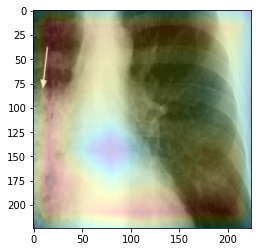

In [18]:
from model import DenseNet121
from extras import getCAM, SaveFeatures
from inference import get_tensor
import inference
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os
from PIL import Image
import io
import sys
from matplotlib.pyplot import imshow
from torch import topk
from torch.nn import functional as F
import skimage.transform

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
images=get_tensor("pn.png")
images=images.to(device)
img = images[0].cpu().numpy()[0]
imshow(img,cmap='gray')
class_idx,cam=get_prediction("pn.png")
print(class_idx[0])
imshow(cam,alpha=0.2,cmap='jet')
